<a href="https://colab.research.google.com/github/Eugenia27/cuandoLlueve/blob/master/Copia_de_Cuando_Llueve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion de librerias

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.plotly as plo
import plotly.graph_objs as go

## Lectura de datos

In [0]:
lluvias = pd.read_csv("https://raw.githubusercontent.com/lprone/cuandoLlueve/master/Analisis%20y%20visualizacion/rain.csv", parse_dates = True, index_col="date" )

## Previsualización de datos

In [0]:
lluvias.rain.describe()

count    15034.000000
mean         3.331914
std         11.451975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        220.000000
Name: rain, dtype: float64

In [0]:
lluvias2 = lluvias[lluvias.rain > 0]

In [0]:
lluvias2.rain.describe()

count    2459.000000
mean       20.370882
std        21.327274
min         1.000000
25%         5.000000
50%        13.000000
75%        28.000000
max       220.000000
Name: rain, dtype: float64

In [0]:
lluvias.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0


## Grafico de datos

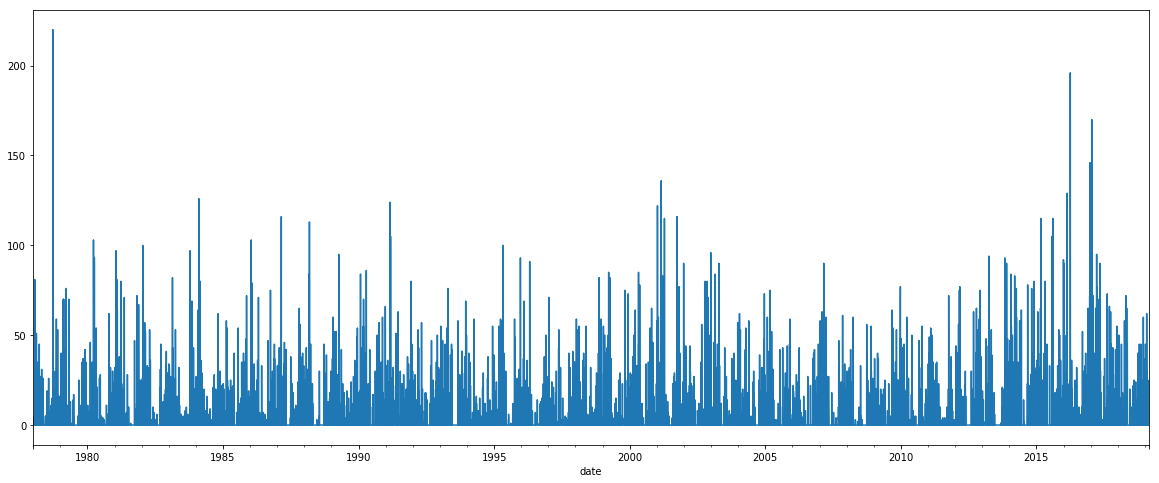

In [0]:
lluvias.rain.plot(figsize=(20,8))

## Ejercicios

Ej 1) 
Realizar analisis descriptivo de los datos. Describir variables, calcular estadísticos que se consideren apropiados,etc

Ej 2) 
Graficar variables

Ej 3)
Realizar test de normalidad

Ej 4) 
Realizar analisis de correlacion e independencia entre variables

Ej 5)
Elaborar conclusiones a partir de los resultados obtenidos en los puntos anteriores

In [0]:
import datetime as dt

In [0]:
lluvias['mes'] = lluvias.index.month
lluvias['año'] = lluvias.index.year
lluvias['mesHid'] = (lluvias.index.month+5)%12+1
lluvias['anoHid'] = (lluvias.index + dt.timedelta(days=181))

In [0]:
#lluvias[['mesHid','anoHid']]

In [0]:
lluvias[lluvias.rain.isna()==True]

,rain,mes,año,mesHid
date,,,,


In [0]:
dict_estaciones={
  1 : 1,
  2 : 1,
  3 : 2,
  4 : 2,
  5 : 2,
  6 : 3,
  7 : 3,
  8 : 3,
  9 : 4,
  10: 4,
  11: 4,
  12: 1}


In [0]:
lluvias['estacion'] = lluvias.mes.map(dict_estaciones)

In [0]:
lluvias2000 = lluvias[lluvias.año==2000]

In [0]:
lluvias2000_mes = lluvias[lluvias.año==2000].groupby('mes').rain.sum()
lluvias2000_est = lluvias[lluvias.año==2000].groupby('estacion').rain.sum()

In [0]:
def plotcxaños(_año,_xaños,_leg_bool):
  delta=0
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    delta+=0.04
    color = (1-delta,0.+delta,0+delta)
    plt.plot(lluvias_mes.index,lluvias_mes.values,marker='.',color=color,label=str(año))
    
  plt.ylim(0,400)
  if _leg_bool==True:
      plt.legend(bbox_to_anchor=(1.05, 0.9))

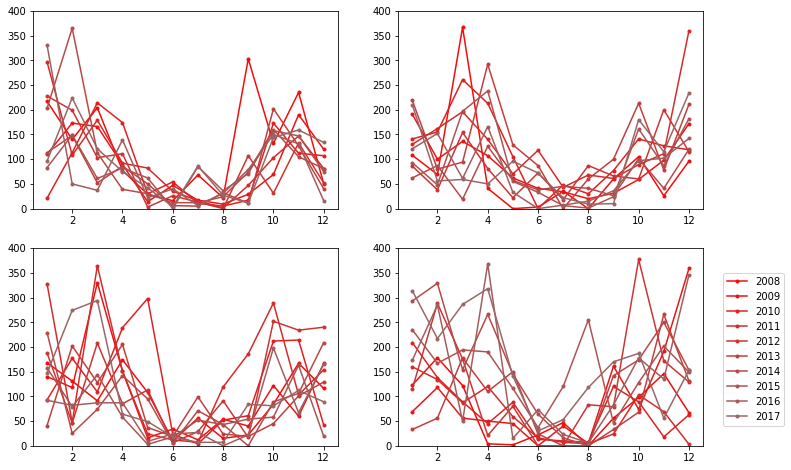

In [0]:
fig = plt.figure(figsize=(12,8))
ax=fig.add_subplot(221)
plotcxaños(1978,10,False)
ax=fig.add_subplot(222)
plotcxaños(1988,10,False)
ax=fig.add_subplot(223)
plotcxaños(1998,10,False)
ax=fig.add_subplot(224)
plotcxaños(2008,10,True)

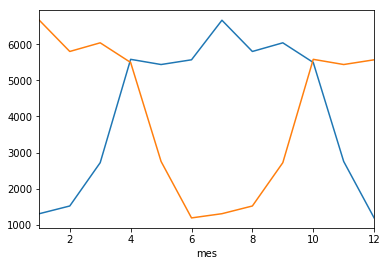

In [0]:
lluvias.groupby('mesHid').rain.sum().plot()
lluvias.groupby('mes').rain.sum().plot()

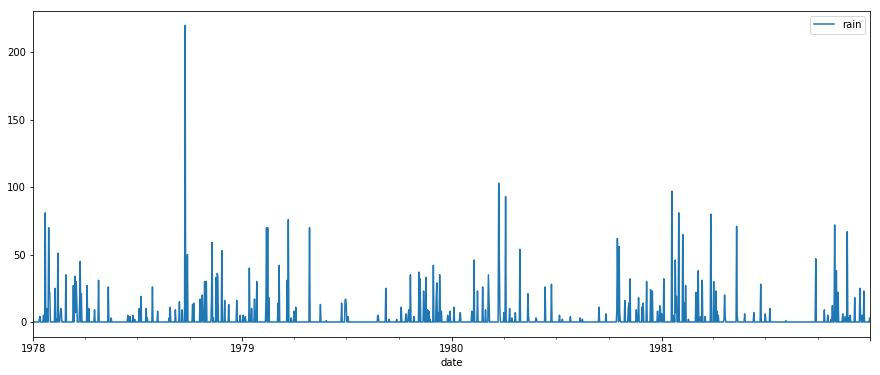

In [0]:
lluvias[['rain']][lluvias.index.year<1982].plot(figsize=(15,6))

In [0]:

def grupos(_xaños,_año):
  paraMedianas = []
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    paraMedianas.append(lluvias_mes.values)
    
  return paraMedianas

In [0]:
xaños = 10
año   = 1978
medianas = grupos(xaños,año)

In [0]:
sumas = pd.pivot_table(lluvias, values='rain', index=['año'],columns=['mesHid'], aggfunc=np.sum)

In [0]:
sumas

mesHid,1,2,3,4,5,6,7,8,9,10,11,12
año,,,,,,,,,,,,
1978,68.0,22.0,303.0,132.0,235.0,50.0,217.0,140.0,204.0,77.0,29.0,16.0
1979,17.0,9.0,29.0,69.0,190.0,120.0,110.0,173.0,166.0,89.0,14.0,47.0
1980,11.0,5.0,17.0,173.0,112.0,107.0,21.0,113.0,214.0,174.0,30.0,54.0
1981,16.0,1.0,47.0,103.0,147.0,81.0,297.0,108.0,179.0,92.0,82.0,35.0
1982,13.0,0.0,107.0,31.0,133.0,52.0,228.0,199.0,103.0,111.0,3.0,26.0
1983,5.0,32.0,11.0,202.0,127.0,40.0,113.0,148.0,52.0,86.0,50.0,6.0
1984,12.0,24.0,74.0,160.0,105.0,81.0,203.0,365.0,113.0,39.0,30.0,12.0
1985,85.0,36.0,71.0,158.0,147.0,75.0,83.0,149.0,61.0,82.0,62.0,0.0
1986,6.0,31.0,79.0,150.0,131.0,16.0,331.0,50.0,37.0,139.0,22.0,40.0


In [56]:
sumas.describe()

mesHid,1,2,3,4,5,6,7,8,9,10,11,12
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,42.000000,42.000000,41.000000,41.000000,41.000000,41.000000
mean,31.804878,37.024390,66.317073,136.219512,132.707317,135.902439,158.785714,138.166667,147.390244,134.097561,67.146341,28.951220
std,29.552681,47.985669,58.956526,70.030533,60.129961,84.908423,81.639761,83.375705,90.112951,84.687899,58.814352,26.821588
min,0.000000,0.000000,0.000000,31.000000,18.000000,3.000000,21.000000,25.000000,19.000000,4.000000,0.000000,0.000000
25%,7.000000,5.000000,24.000000,89.000000,101.000000,81.000000,93.750000,71.500000,87.000000,77.000000,24.000000,10.000000
50%,22.000000,24.000000,56.000000,128.000000,127.000000,129.000000,144.000000,132.500000,128.000000,111.000000,55.000000,23.000000
75%,47.000000,52.000000,79.000000,174.000000,167.000000,167.000000,215.250000,176.000000,196.000000,174.000000,96.000000,38.000000
max,120.000000,255.000000,303.000000,377.000000,266.000000,360.000000,331.000000,365.000000,367.000000,368.000000,298.000000,118.000000


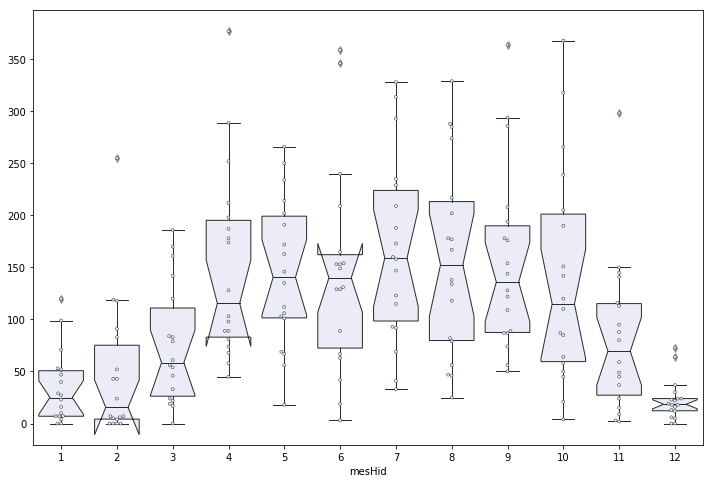

In [0]:
paleta = sb.light_palette((210, 90, 60), input="husl")
c4='#56cbf9'
c2='#e9ebf8'
c5='#f8f8f8'
c1='#30343f'
c3='#272d2d'
plt.figure(figsize=(12,8))
menor=2000
mayor=2017

sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,notch=True,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)

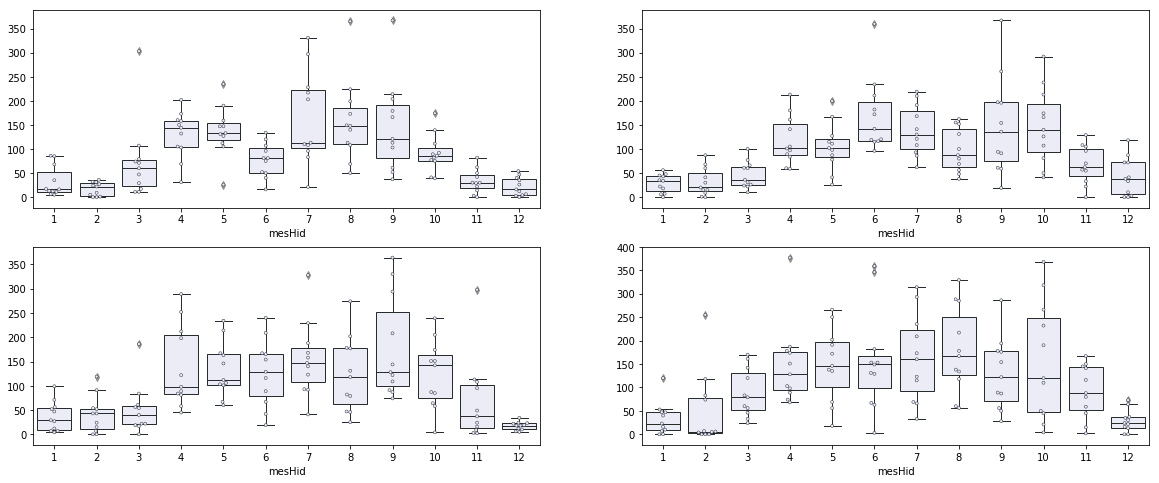

In [0]:
fig = plt.figure(figsize=(20,8))


ax = fig.add_subplot(221)
menor=1978
mayor=1988
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)

ax = fig.add_subplot(222)
menor=1988
mayor=1998
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)

ax = fig.add_subplot(223)
menor=1998
mayor=2008
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)


ax = fig.add_subplot(224)
menor=2008
mayor=2018
sb.boxplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)],color=c2,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas[(sumas.index<=mayor)&(sumas.index>=menor)], color=c2,size=3,edgecolor=c1,linewidth=0.5)




In [90]:
medianas = []
bigInfs  = []
bigSups  = []

for i in range(4):
  añoInicial=1978+i*10
  añoFinal=añoInicial+9
  #print(añoInicial,añoFinal)
  subTabla = sumas[(sumas.index<=añoFinal)&(sumas.index>=añoInicial)]
  describeST = subTabla.describe()
  #print(subTabla.describe())
  describeST.loc['bigInf'] = describeST.loc['25%']-(describeST.loc['75%']-describeST.loc['25%'])*1.5
  describeST.loc['bigSup'] = describeST.loc['75%']+(describeST.loc['75%']-describeST.loc['25%'])*1.5
  medianas.append(describeST.loc['50%'])
  bigInfs.append(describeST.loc['bigInf'])
  bigSups.append(describeST.loc['bigSup']) 
  print(describeST)
  

mesHid          1          2           3   ...          10         11         12
count    10.000000  10.000000   10.000000  ...   10.000000  10.000000  10.000000
mean     31.900000  18.700000   74.900000  ...   96.400000  36.400000  24.000000
std      33.514342  13.663008   86.600552  ...   37.369625  23.362838  19.200694
min       5.000000   0.000000   11.000000  ...   39.000000   3.000000   0.000000
25%      11.250000   6.000000   20.000000  ...   78.250000  23.750000   7.500000
50%      14.500000  23.000000   59.000000  ...   87.500000  30.000000  21.000000
75%      55.250000  30.000000   77.750000  ...  106.250000  48.000000  38.750000
max      86.000000  36.000000  303.000000  ...  174.000000  82.000000  54.000000
bigInf  -54.750000 -30.000000  -66.625000  ...   36.250000 -12.625000 -39.375000
bigSup  121.250000  66.000000  164.375000  ...  148.250000  84.375000  85.625000

[10 rows x 12 columns]
mesHid         1           2           3   ...          10       11          12
count

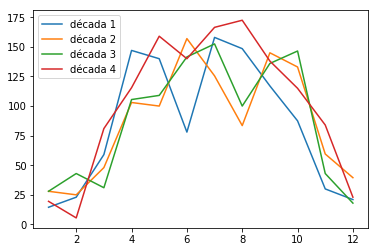

In [71]:
for i in range(4):
  plt.plot(medianas[i],label='década: '+str(i+1))
plt.legend()

date
1978-01-01     0
1978-01-02     0
1978-01-03     0
1978-01-04     0
1978-01-05     0
1978-01-06     0
1978-01-07     0
1978-01-08     0
1978-01-09     0
1978-01-10     0
1978-01-11     0
1978-01-12     3
1978-01-13     4
1978-01-14     0
1978-01-15     0
1978-01-16     0
1978-01-17     0
1978-01-18     0
1978-01-19     5
1978-01-20     0
1978-01-21     0
1978-01-22    81
1978-01-23     0
1978-01-24     0
1978-01-25    10
1978-01-26     0
1978-01-27     0
1978-01-28    70
1978-01-29    23
1978-01-30    21
Name: rain, dtype: int64

In [81]:
lluvias[lluvias.rain!=0].groupby('rain').rain.count()

rain
1       22
2      136
3      186
4      133
5      158
6      100
7      100
8       85
9       50
10     108
11      43
12      79
13      30
14      61
15      98
16      37
17      31
18      54
19      24
20      66
21      25
22      36
23      45
24      27
25      52
26      18
27      30
28      25
29      16
30      46
      ... 
80       7
81       2
82       3
83       2
84       4
85       2
86       1
90       6
91       1
92       1
93       3
94       1
95       2
96       2
97       2
100      2
103      2
105      2
113      1
115      3
116      2
122      1
124      1
126      1
129      1
136      1
146      1
170      1
196      1
220      1
Name: rain, Length: 108, dtype: int64

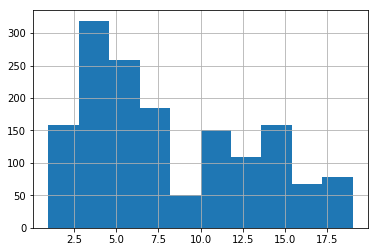

In [79]:
lluvias[(lluvias.rain<20)&(lluvias.rain>0)].rain.hist(bins=10)

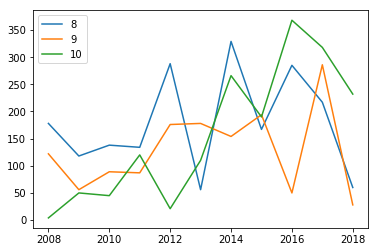

In [0]:

for i in range(3):
  plt.plot(sumas[(sumas.index<=mayor)&(sumas.index>=menor)].index.values,sumas[(sumas.index<=mayor)&(sumas.index>=menor)][i+8].values,label=i+8)
plt.legend() 

In [0]:
for i in range(5):
  if i ==0:
    continue
  

In [0]:
sb.qq

AttributeError: ignored

In [0]:
from scipy import stats

x1 = lluvias[lluvias['rain'].notnull()]

##Calculamos la "skewness"

skew = stats.skew(x1)

#print(x1.mean()) # => 3.332
#print(x1.std()) # => 11.452
#print(len(x1)) # => 45034

m1=3.331914
s1=11.451975
l1=15034.00

stats.kstest(x1, 'norm', args=(m1, s1), N=l1)
